In [533]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [534]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt



In [535]:
X, y = make_classification(n_samples=100, n_features = 2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [536]:
y.shape

(100,)

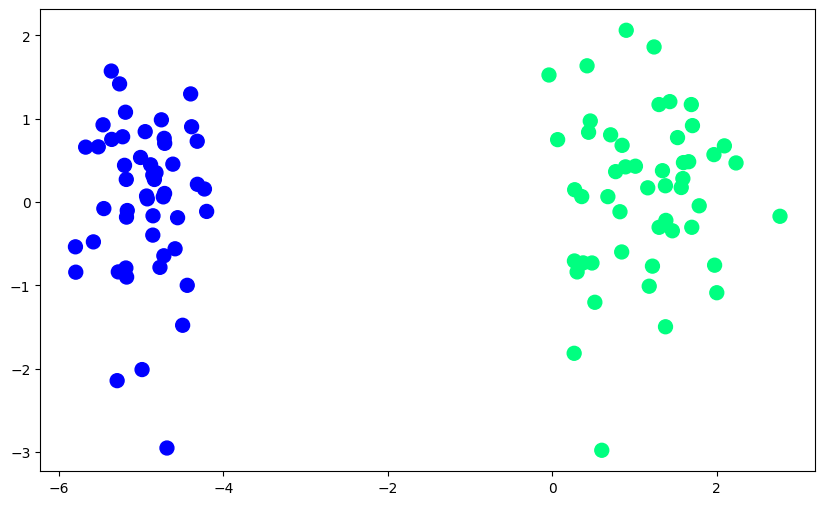

In [537]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

# Perceptron

In [538]:
def step(z):
    return 1 if z> 0 else 0 

In [539]:
def perceptron(X, y, epochs = 1000):
    X = np.insert(X, 0, 1, axis=1) # adding a column of value 1 for biased term(b)
    weights = np.ones(X.shape[1]) 

    lr = 0.1

    for i in range(epochs):
        j = np.random.randint(0, 100)

        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]


    return weights[0], weights[1:]
        

In [540]:
intercept_p, coeff_p = perceptron(X, y, 5000)

In [541]:
print(intercept_p)
print(coeff_p)

1.2000000000000002
[1.08682872 0.52024363]


# find values of m & b 
in terms of eq y = mx + c

m = -A/B 
c = C/B

C = intercept_
A = coeff_[0]
B = coeff_[1]

In [542]:
m_p = -(coeff_p[0]/coeff_p[1])
b_p = -(intercept_p/coeff_p[1])

In [543]:
x_input = np.linspace(-2, 3, 100)

y_input = m_p*x_input + b_p

(-8.0, 10.0)

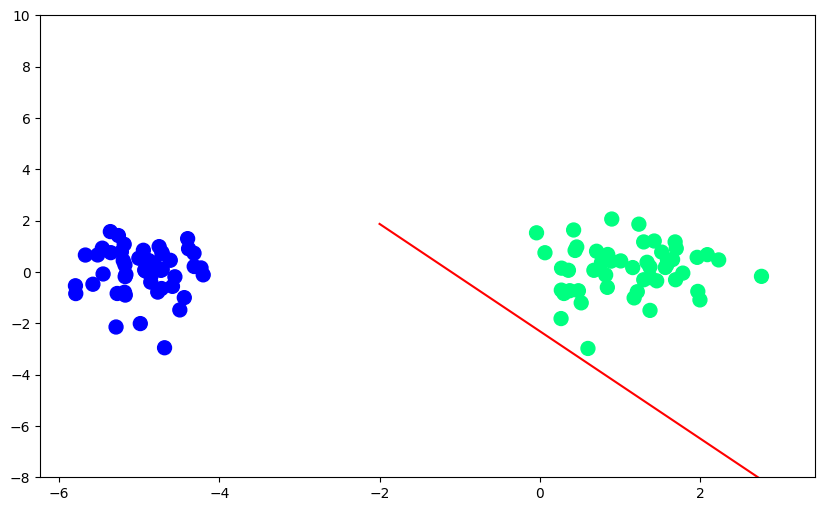

In [544]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color ='red')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='winter', s = 100)
plt.ylim(-8, 10)

# Using Scikit Learn Logistic Regression

In [545]:
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [546]:
coeff_l = lor.coef_[0]
intercept_l = lor.intercept_[0]

In [547]:
print(lor.coef_)
print(lor.intercept_)

[[1.77298737 0.0122258 ]]
[3.54861952]


In [548]:
print(coeff_l)

[1.77298737 0.0122258 ]


In [549]:
m_l = -(coeff_l[0]/coeff_l[1])
b_l = -(intercept_l/coeff_l[1])

In [550]:
x_input1 = np.linspace(-3, 3, 100)

y_input1 = m_l*x_input1 + b_l

(-8.0, 10.0)

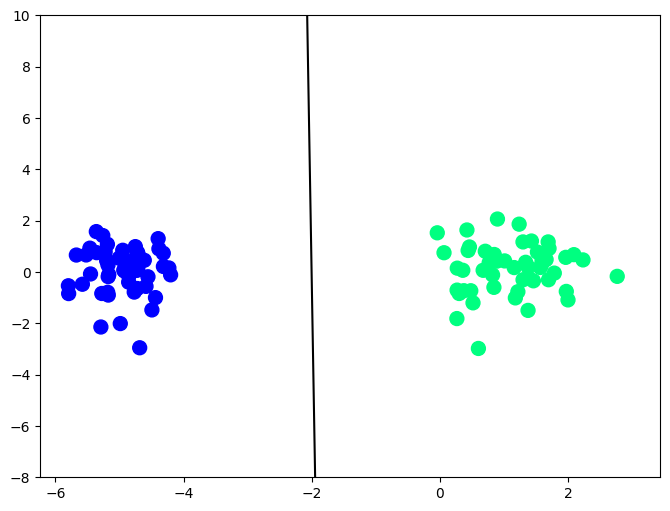

In [551]:
plt.figure(figsize=(8, 6))
plt.plot(x_input1, y_input1, color ='black')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='winter', s = 100)
plt.ylim(-8, 10)

# Observation

> Perceptron works only for linearly separable data. If data is not linearly separable, it may not converge or find a good decision boundary. Logistic regression can handle data that are not perfectly separable.

> Perceptron only performs binary classification, while logistic regression naturally extends to probabilistic output, giving class membership probabilities.

# Using Sigmoid Function

In [552]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [553]:
def perceptron_with_sigmoid(X, y, epochs = 1000):
    X = np.insert(X, 0, 1, axis=1) # adding a column of value 1 for biased term(b)
    weights = np.ones(X.shape[1]) 

    lr = 0.1

    for i in range(epochs):
        j = np.random.randint(0, 100)

        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]


    return weights[0], weights[1:]

# the value of intercept and coeff changes with different epochs(no. of iterations)

In [554]:
intercept_, coeff_ = perceptron_with_sigmoid(X, y, 5000)

print(intercept_)
print(coeff_)

3.78211043864399
[2.88017875 0.12235805]


In [555]:
m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])

In [556]:
x_input_s = np.linspace(-3, 3, 100)

y_input_s = m*x_input + b

(-8.0, 10.0)

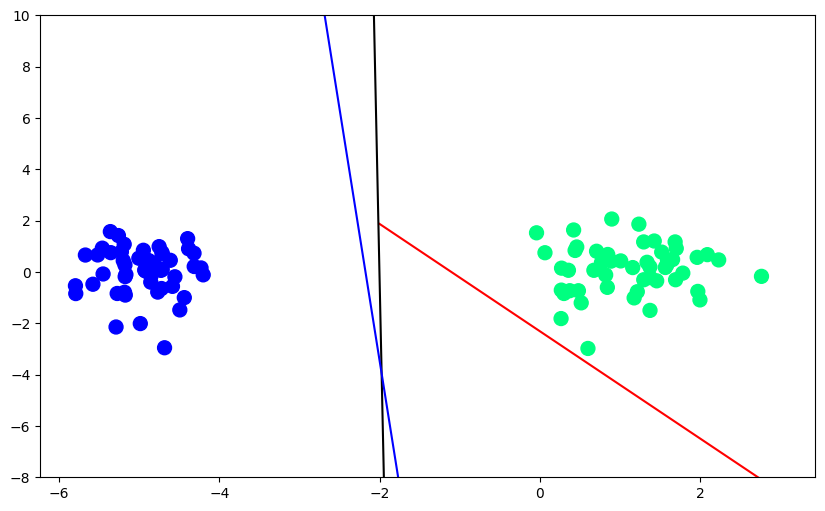

In [557]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color ='red')
plt.plot(x_input1, y_input1, color ='black')
plt.plot(x_input_s, y_input_s, color ='blue')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='winter', s = 100)
plt.ylim(-8, 10)

# Sigmoid
> **Using sigmoid i.e. magnitude provides a better classification**